<a href="https://colab.research.google.com/github/Vladmir-dev/First-contribution-practice/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [2]:
def load_stock_data(symbol, start_date, end_date):
    data = yf.download(symbol, start=start_date, end=end_date)
    return data

In [3]:
def preprocess_data(data, target_col='Close', sequence_length=10):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data[target_col].values.reshape(-1, 1))

    x_data, y_data = [], []
    for i in range(len(scaled_data) - sequence_length):
        x_data.append(scaled_data[i:i + sequence_length, 0])
        y_data.append(scaled_data[i + sequence_length, 0])

    x_data, y_data = np.array(x_data), np.array(y_data)

    x_data = np.reshape(x_data, (x_data.shape[0], x_data.shape[1], 1))

    return x_data, y_data, scaler

In [4]:
# Function to build LSTM model
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dense(units=25))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [23]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478997,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490201,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386964,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375157,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417540,447610800
...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.127075,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.307220,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.339409,85438400


from matplotlib import pyplot as plt
data['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['High'].plot(kind='hist', bins=20, title='High')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['Low'].plot(kind='hist', bins=20, title='Low')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Open', y='High', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Low', y='Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Close', y='Adj Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['Open'].plot(kind='line', figsize=(8, 4), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['High'].plot(kind='line', figsize=(8, 4), title='High')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['Low'].plot(kind='line', figsize=(8, 4), title='Low')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

In [15]:
# Load historical data
symbol = 'AAPL'
start_date = '2010-01-01'
end_date = '2023-01-01'

data = load_stock_data(symbol, start_date, end_date)
daily_returns = data['Close'].pct_change().dropna().values
# Preprocess data
# sequence_length = 10
# x_data, y_data, scaler = preprocess_data(data, sequence_length=sequence_length)

X, y = data.drop(columns=["Close"]), data["Close"]
print(X.shape, data.shape, y.shape)
# x_data
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

[*********************100%%**********************]  1 of 1 completed

(3272, 5) (3272, 6) (3272,)


In [19]:

# Build and train LSTM model
input_shape = (x_train.shape[1], 1)
model = build_lstm_model(input_shape)
model.fit(x_train, y_train, epochs=50, batch_size=32)

# Make predictions on the test set
predictions = model.predict(x_test)
# predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
# y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate the model (you may need a more sophisticated evaluation metric for a trading strategy)
mse = np.mean(np.square(predictions.ravel() - y_test))
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 4663.266990670241


In [20]:
daily_returns

array([ 0.00172893, -0.01590632, -0.00184871, ..., -0.03068521,
        0.02832434,  0.00246888])

In [21]:
def plot(daily_returns):
    buy_sell_signal = np.array([1, -1, 0, 1, -1])  # 1 for buying, -1 for selling, 0 for holding

    # Cumulative Returns
    cumulative_returns = np.cumprod(1 + daily_returns) - 1

    # Dates (replace with your dates or use integers as indices)
    dates = np.arange(len(daily_returns))

    # Plotting
    plt.figure(figsize=(10, 6))

    # Plot Cumulative Returns
    plt.plot(dates, cumulative_returns, label='Cumulative Returns', color='blue')

    # Plot Buy Signals
    buy_indices = np.where(buy_sell_signal == 1)[0]
    plt.scatter(buy_indices, cumulative_returns[buy_indices], marker='^', color='green', label='Buy Signal')

    # Plot Sell Signals
    sell_indices = np.where(buy_sell_signal == -1)[0]
    plt.scatter(sell_indices, cumulative_returns[sell_indices], marker='v', color='red', label='Sell Signal')

    # Add labels and legend
    plt.title('Buy and Sell Signals')
    plt.xlabel('Days')
    plt.ylabel('Cumulative Returns')
    plt.legend()

    # Show the plot
    plt.show()

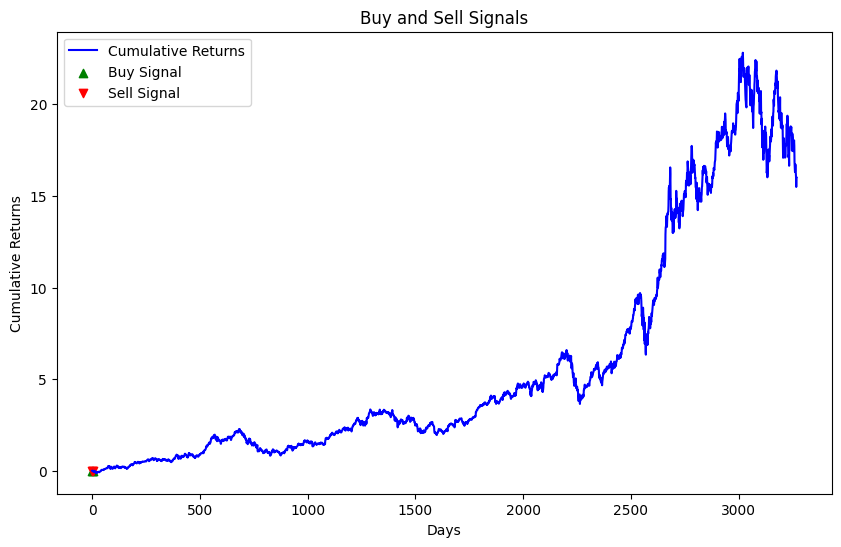

In [22]:
plot(daily_returns)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
data['Hourly_Return'] = data['Close'].pct_change().shift(-1)  # Hourly returns
data['Signal'] = np.where(data['Hourly_Return'] > 0, 1, np.where(data['Hourly_Return'] < 0, -1, 0))  # Signal: 1 for long, -1 for short, 0 for do nothing

# Features and target variable
# X = data[['Previous_Hour_Close', 'Other_Features']]
# y = data['Signal']
data['Hourly_Return']

Date
2010-01-04    0.001729
2010-01-05   -0.015906
2010-01-06   -0.001849
2010-01-07    0.006648
2010-01-08   -0.008821
                ...   
2022-12-23   -0.013878
2022-12-27   -0.030685
2022-12-28    0.028324
2022-12-29    0.002469
2022-12-30         NaN
Name: Hourly_Return, Length: 3272, dtype: float64